In [2]:
import cv2 # For capturing Videos

import math

import matplotlib.pyplot as plt # I dont think I need this anymore
%matplotlib inline

import pandas as pd # For creating my training map

from keras.preprocessing import image # For preprocessing Images

import numpy as np # For converting my images into arrays to be fed into my model

from keras.utils import np_utils

from skimage.transform import resize # For resizing Images

from skimage.io import imread # To read the image

from skimage.io import imshow # to show the image

In [ ]:
# Only use this when splicing a video file (Image Sequencing?)

count = 0
video_file = 'batch_??/Training_Video_01.mp4'
cap = cv2.VideoCapture(video_file)
frame_rate = cap.get(5)
x = 1
while(cap.isOpened()):
    frame_id = cap.get(1)
    ret, frame = cap.read()
    if(ret != True):
        break
    if(frame_id % math.floor(frame_rate) == 0):
        filename = "Train/batch_??_%dframe.jpg" % count; count = count + 1
        cv2.imwrite(filename, frame)
cap.release()
print("Done")

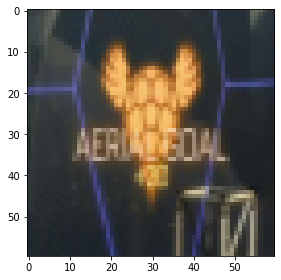

In [3]:
# To see an example:
img =imread('Train/Aerial Goals/batch_01_frame188.jpg')
# Resize and Crop the Image

#imshow(img)

test_1 = resize(img, output_shape=(300,300))
imshow(test_1[30:90, 120:180])

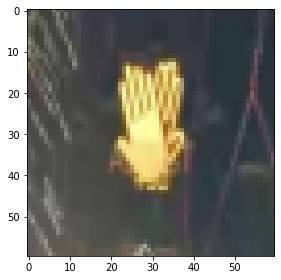

In [4]:
# Another Example
img2 =imread('Train/Assists/batch_06_frame296.jpg')
# Resize and Crop the Image

#imshow(img)

test_2 = resize(img2, output_shape=(300,300))[30:90, 120:180]
imshow(test_2)

In [43]:
# Creating Data Frame with the mapping of the features (dummified items)
import os

labels = os.listdir('Train') 

image_id_column = []
for folder_name in labels:
    image_id_column = image_id_column + os.listdir(f'Train/{folder_name}')

class_column = []
for folder_name in labels:
    folder = os.listdir(f'Train/{folder_name}')
    for image_id in folder:
        class_column.append(folder_name)
        
training_map = pd.DataFrame([image_id_column, class_column]).transpose()
training_map.columns = ['Image_ID', 'Classification']
training_map

,Image_ID,Classification
0,batch_01_frame188.jpg,Aerial Goals
1,batch_01_frame189.jpg,Aerial Goals
2,batch_01_frame190.jpg,Aerial Goals
3,batch_01_frame290.jpg,Aerial Goals
4,batch_01_frame291.jpg,Aerial Goals
...,...,...
488,batch_04_frame369.jpg,Wins
489,batch_04_frame370.jpg,Wins
490,batch_06_frame397.jpg,Wins
491,batch_12_frame525.jpg,Wins


In [50]:
# Converting images into pixels
X = [] 

for folder in labels:
    images_by_folder = os.listdir(f'Train/{folder}')
    for image_id in images_by_folder:
        img = plt.imread(f'Train/{folder}/' + image_id)
        X.append(img)

X = np.array(X)  # Entire array of images for training/validation.

In [51]:
X.shape

(493, 720, 1280, 3)

In [52]:
Y = training_map['Classification']
Y = pd.get_dummies(Y)
Y.head()

,Aerial Goals,Assists,Backwards Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminations,First Touches,Goals,...,Long Goals,Low Fives,MVPs,Playmaker,Pool Shots,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Resizes images and crops them for Keras Model
image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(300,300))[30:90, 120:180].astype(int) # Crop shape: [30:90, 120:180]
    image.append(a)

X = np.array(image)


In [54]:
print(X)

[[[[ 56  66  66]
   [ 58  68  68]
   [ 57  64  66]
   ...
   [ 68  73  72]
   [ 48  53  59]
   [ 43  50  58]]

  [[ 52  62  63]
   [ 55  65  65]
   [ 60  67  69]
   ...
   [ 52  59  63]
   [ 45  53  61]
   [ 43  50  59]]

  [[ 58  68  69]
   [ 59  69  70]
   [ 67  75  77]
   ...
   [ 46  54  60]
   [ 45  54  63]
   [ 42  51  58]]

  ...

  [[ 31  39  42]
   [ 31  40  42]
   [ 29  38  41]
   ...
   [ 34  38  38]
   [ 31  37  37]
   [ 32  37  40]]

  [[ 31  39  42]
   [ 32  41  44]
   [ 30  39  41]
   ...
   [ 35  39  40]
   [ 32  37  38]
   [ 33  38  41]]

  [[ 31  39  42]
   [ 30  40  42]
   [ 33  42  45]
   ...
   [ 37  40  42]
   [ 33  39  40]
   [ 35  40  43]]]


 [[[ 46  64  74]
   [ 45  63  73]
   [ 46  64  74]
   ...
   [ 81  83  77]
   [ 82  84  80]
   [ 85  87  83]]

  [[ 45  63  73]
   [ 44  62  72]
   [ 45  63  73]
   ...
   [ 87  88  80]
   [ 89  90  82]
   [ 90  91  83]]

  [[ 45  63  74]
   [ 45  63  73]
   [ 46  64  74]
   ...
   [ 95  94  84]
   [103 102  90]
   [117 117

In [55]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

In [56]:
print(X.shape)
print(X)

(493, 60, 60, 3)
[[[[ -37.939003    -50.779       -67.68      ]
   [ -35.939003    -48.779       -65.68      ]
   [ -37.939003    -52.779       -66.68      ]
   ...
   [ -31.939003    -43.779       -55.68      ]
   [ -44.939003    -63.779       -75.68      ]
   [ -45.939003    -66.779       -80.68      ]]

  [[ -40.939003    -54.779       -71.68      ]
   [ -38.939003    -51.779       -68.68      ]
   [ -34.939003    -49.779       -63.68      ]
   ...
   [ -40.939003    -57.779       -71.68      ]
   [ -42.939003    -63.779       -78.68      ]
   [ -44.939003    -66.779       -80.68      ]]

  [[ -34.939003    -48.779       -65.68      ]
   [ -33.939003    -47.779       -64.68      ]
   [ -26.939003    -41.779       -56.68      ]
   ...
   [ -43.939003    -62.779       -77.68      ]
   [ -40.939003    -62.779       -78.68      ]
   [ -45.939003    -65.779       -81.68      ]]

  ...

  [[ -61.939003    -77.779       -92.68      ]
   [ -61.939003    -76.779       -92.68      ]
   [ -62.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [58]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [59]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

In [60]:
X_train = base_model.predict(X_train)

In [61]:
X_test = base_model.predict(X_test)

In [62]:
print(X_train.shape)
print(X_test.shape)

(394, 1, 1, 512)
(99, 1, 1, 512)


In [63]:
X_train = X_train.reshape(394, 1*1*512)
X_test = X_test.reshape(99, 1*1*512)

In [64]:
train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [65]:
model = Sequential()
model.add(InputLayer((1*1*512)))
model.add(Dense(units = 1024, activation='sigmoid'))
model.add(Dense(21, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 21)                21525     
Total params: 546,837
Trainable params: 546,837
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0604 - accuracy: 0.3858 - val_loss: 2.1942 - val_accuracy: 0.3232
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 2.0164 - accuracy: 0.4213 - val_loss: 2.1894 - val_accuracy: 0.3030
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 2.0102 - accuracy: 0.3909 - val_loss: 2.1934 - val_accuracy: 0.2424
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9579 - accuracy: 0.3782 - val_loss: 2.1607 - val_accuracy: 0.3333
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9062 - accuracy: 0.4036 - val_loss: 2.1400 - val_accuracy: 0.2424
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 1.8919 - accuracy: 0.4492 - val_loss: 2.1248 - val_accuracy: 0.3333
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.8675 - accuracy: 0.4772 - val_loss: 2.0967 - val_accuracy: 0.3535
Epoch 8/100
1

Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6316 - accuracy: 0.8807 - val_loss: 1.7504 - val_accuracy: 0.4949
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.8604 - val_loss: 1.7297 - val_accuracy: 0.5051
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.8959 - val_loss: 1.7431 - val_accuracy: 0.4949
Epoch 62/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5942 - accuracy: 0.8883 - val_loss: 1.7357 - val_accuracy: 0.4848
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.8959 - val_loss: 1.7114 - val_accuracy: 0.4949
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.8832 - val_loss: 1.7687 - val_accuracy: 0.4848
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.9010 - val_loss: 1.7476 - val_accuracy: 0.4949
Epoch 